# Setup

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("articles_2017-10-01_2017-10-31.csv", index_col="id", \
                   parse_dates=["published", "discovered"])
data.head()

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank
id,,,,,,,,,,,,,,,,,,,
df8cf9e5ed31a1bfb34c9b73d9e5bce5ab98b439,https://www.economist.com/news/europe/21729855...,An unconstitutional vote on independence turns...,2017-10-01 16:09:23.688,2017-10-01 00:00:00,125,0.508058,2017-10-01T21:22:11.563Z,6,63,56,The Economist,economist_com,1299,10322,35.0,True,8312258.0,2017-10-02T17:09:04.000Z,1825
ff73a23349976db8c3e5ae3d4a64242b156f14a7,https://www.washingtonpost.com/sports/colleges...,Rourke leads Ohio to shootout win over Massach...,2017-10-01 00:07:21.546,2017-10-01 00:00:07,0,0.000000,2017-10-01T06:23:10.290Z,0,0,0,The Washington Post,washingtonpost_com,0,0,NaN,False,NaN,NaN,191
107efa77273acbbe8fd60c139306e7fcd09fdd98,https://www.nytimes.com/2017/09/30/sports/base...,Luis Severino and the Yankees Are Straddling a...,2017-10-01 00:01:10.412,2017-10-01 00:00:13,38,0.459418,2017-10-01T00:13:03.108Z,5,4,29,New York Times,nytimes_com,0,780,125.0,False,NaN,NaN,120
5c4db3ff5ac83175ba202cb9327d7e7b52f79f46,https://www.washingtonpost.com/sports/colleges...,Kentucky rebounds to outlast Eastern Michigan ...,2017-10-01 00:07:22.846,2017-10-01 00:00:30,0,0.000000,2017-10-01T06:23:10.293Z,0,0,0,The Washington Post,washingtonpost_com,0,0,NaN,False,NaN,NaN,191
faa6a6d39f269bf6a40af0f52f02a41cb5b38601,https://www.washingtonpost.com/sports/mystics/...,USA Basketball hosts a Women in the Game seminar,2017-10-01 00:07:22.215,2017-10-01 00:01:13,0,0.000000,2017-10-01T06:23:10.291Z,0,0,0,The Washington Post,washingtonpost_com,0,0,NaN,False,NaN,NaN,191


# Response Score

The response score is a number between 0 and 50 that indicates the level of response to an article.



Perhaps in the future we may choose to include other factors, but for now we just include engagements on Facebook. The maximum score of 50 should be achieved by an article that does really well compared with others.

In [3]:
pd.options.display.float_format = '{:.2f}'.format
data.fb_engagements.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count    158885.00
mean       1290.91
std        9886.87
min           0.00
50%          26.00
75%         263.00
90%        1656.00
95%        4629.00
99%       24130.32
99.5%     40363.06
99.9%    106861.46
max     1680741.00
Name: fb_engagements, dtype: float64

There's a few articles there with 1 million plus engagements, let's just double check that.

In [4]:
data[data.fb_engagements > 1000000]

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank
id,,,,,,,,,,,,,,,,,,,
3d58d5fdd5b5649ac1e92f4853a80fe7d2b244d3,http://www.foxnews.com/entertainment/2017/10/0...,"Top CBS lawyer: No sympathy for Vegas vics, 'p...",2017-10-02 16:54:13.613,2017-10-02 16:48:32,1680741,3545.41,2017-10-02T20:33:04.125Z,469349,1031278,180114,Fox News,foxnews_com,0,2601,174.00,True,15888170.00,2017-10-02T20:15:01.000Z,285


In [5]:
data.fb_engagements.mode()

0    0
dtype: int64

Going back to the enagement counts, we see the mean is 1,290, mode is zero, median is 26, 90th percentile is 1,656, 99th percentile is 24,130, 99.5th percentile is 40,363. The standard deviation is 9,886, significantly higher than the mean, so this is not a normal distribution. 

Key publishers stats

In [6]:
data.groupby("publisher_id").agg({'url': 'count', 'fb_engagements': ['sum', 'median', 'mean']})

url fb_engagements                
                                  count            sum  median    mean
publisher_id                                                          
anotherangryvoice_blogspot_co_uk     38          72806 1434.50 1915.95
bbc_co_uk                         11973       10440781   40.00  872.03
breitbart_com                      2707       13276781  372.00 4904.61
brexitcentral_com                    53          39843  271.00  751.75
buzzfeed_com                       2010        6444963  153.50 3206.45
cnn_com                            3521       19965843  639.00 5670.50
dailymail_co_uk                   24900       18894463   26.00  758.81
economist_com                       517         183881   49.00  355.67
evolvepolitics_com                   74         226865 1288.00 3065.74
foxnews_com                        6844       23214169   42.00 3391.90
ft_com                             3792         330615    6.00   87.19
huffingtonpost_com                11213       16768347    8.00 1495.44
independent_co_uk                  6578       10132679   42.00 1540.39
indy100_com                         512         463823  127.00  905.90
lemonde_fr                         3918        2323126   88.00  592.94
libdemvoice_org                     177           1880    6.00   10.62
mirror_co_uk                      10525        7532990   48.00  715.72
nbcnews_com                        2207        7893296  389.00 3576.48
newstatesman_com                    567         251219   23.00  443.07
npr_org                            2020        8157583  208.00 4038.41
nytimes_com                        5185       19339366  200.00 3729.87
order-order_com                     296          96614  148.00  326.40
propublica_org                       52         239626  495.00 4608.19
reuters_com                        6125        1939056   21.00  316.58
rt_com                             2678        2417004  217.00  902.54
skwawkbox_org                       127         108501  234.00  854.34
telegraph_co_uk                    7477        3406193   25.00  455.56
thecanary_co                        243         348388  806.00 1433.70
theguardian_com                    8680       11711135  145.00 1349.21
thetimes_co_uk                     8868         262582    1.00   29.61
washingtonpost_com                24227       16152850    0.00  666.73
westmonster_com                     371         352208   28.00  949.35
yournewswire_com                    410        2117388  297.00 5164.36

In [7]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()

non_zero_fb_enagagements = data.fb_engagements[data.fb_engagements > 0]

That's a bit better, but still way too clustered at the low end. Let's look at a log normal distribution.

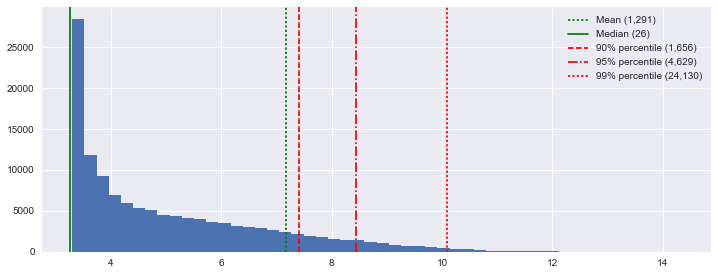

In [8]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(12,4.5))
plt.hist(np.log(non_zero_fb_enagagements + median), bins=50)
plt.axvline(np.log(mean), linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(np.log(median), label=f'Median ({median:,.0f})', color='green')
plt.axvline(np.log(ninety), linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(np.log(ninetyfive), linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
plt.axvline(np.log(ninetynine), linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


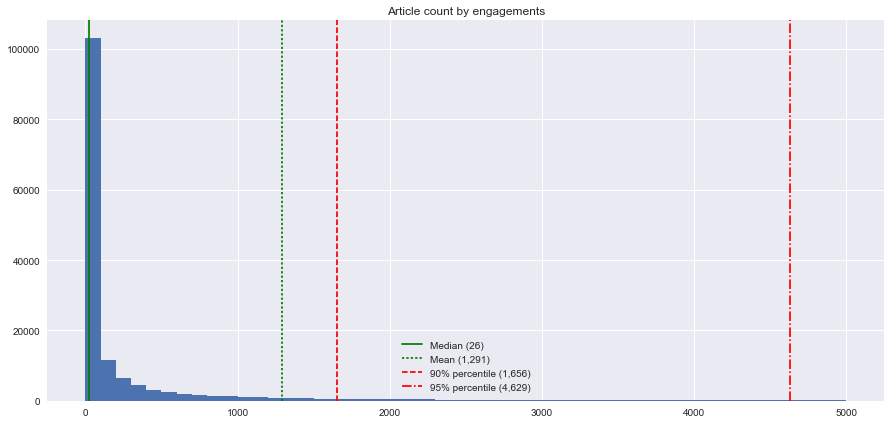

In [9]:
eng = data.fb_engagements[(data.fb_engagements < 5000)]
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(15,7))
plt.hist(eng, bins=50)
plt.title("Article count by engagements")
plt.axvline(median, label=f'Median ({median:,.0f})', color='green')
plt.axvline(mean, linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(ninety, linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(ninetyfive, linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
# plt.axvline(ninetynine, linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


In [10]:
log_engagements = (non_zero_fb_enagagements
                   .clip_upper(data.fb_engagements.quantile(.999))
                   .apply(lambda x: np.log(x + median))
                  )
log_engagements.describe()

count   128733.00
mean         5.07
std          1.78
min          3.30
25%          3.58
50%          4.48
75%          6.13
max         11.58
Name: fb_engagements, dtype: float64

Use standard feature scaling to bring that to a 1 to 50 range


In [11]:
def scale_log_engagements(engagements_logged):
    return np.ceil(
        50 * (engagements_logged - log_engagements.min()) / (log_engagements.max() - log_engagements.min())
    )

def scale_engagements(engagements):
    return scale_log_engagements(np.log(engagements + median))

scaled_non_zero_engagements = scale_log_engagements(log_engagements)
scaled_non_zero_engagements.describe()

count   128733.00
mean        11.18
std         10.78
min          0.00
25%          2.00
50%          8.00
75%         18.00
max         50.00
Name: fb_engagements, dtype: float64

In [12]:
# add in the zeros, as zero
scaled_engagements = pd.concat([scaled_non_zero_engagements, data.fb_engagements[data.fb_engagements == 0]])

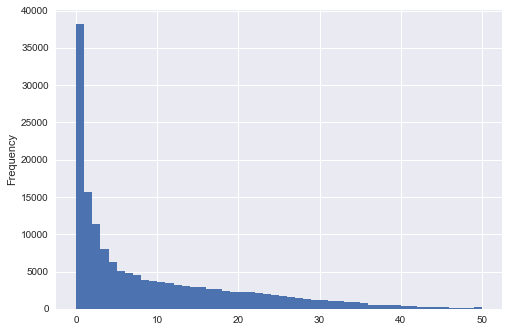

In [13]:
proposed = pd.DataFrame({"fb_engagements": data.fb_engagements, "response_score": scaled_engagements})
proposed.response_score.plot.hist(bins=50)

Looks good to me, lets save that.

In [14]:
data["response_score"] = proposed.response_score

### Proposal

The maximum of 50 points is awarded when the engagements are greater than the 99.9th percentile, rolling over the last month. 

i.e. where $limit$ is the 99.5th percentile of engagements calculated over the previous month, the response score for article $a$ is:

\begin{align}
basicScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   \log(\min(engagements_a,limit) + median(engagements))      & \text{if } engagements_a > 0
\end{cases} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot \frac{basicScore_a - \min(basicScore)}{\max(basicScore) - \min(basicScore)}       & \text{if } engagements_a > 0
\end{cases} \\
\\
\text{The latter equation can be expanded to:} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))}       & \text{if } engagements_a > 0
\end{cases} \\
\end{align}

# Promotion Score

The aim of the promotion score is to indicate how important the article was to the publisher, by tracking where they chose to promote it. This is a number between 0 and 50 comprised of:

- 20 points based on whether the article was promoted as the "lead" story on the publisher's home page
- 15 points based on how long the article was promoted anywhere on the publisher's home page
- 15 points based on whether the article was promoted on the publisher's main facebook brand page

The first two should be scaled by the popularity/reach of the home page, for which we use the alexa page rank as a proxy.

The last should be scaled by the popularity/reach of the brand page, for which we use the number of likes the brand page has.

### Lead story (20 points)

In [15]:
data.mins_as_lead.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count   158885.00
mean         9.21
std         92.90
min          0.00
50%          0.00
75%          0.00
90%          0.00
95%          0.00
99%        269.00
99.5%      584.00
99.9%     1199.12
max      11563.00
Name: mins_as_lead, dtype: float64

As expected, the vast majority of articles don't make it as lead. Let's explore how long typically publishers put something as lead for.

In [16]:
lead_articles = data[data.mins_as_lead > 0]

In [17]:
lead_articles.mins_as_lead.describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count    4515.00
mean      324.11
std       449.13
min         4.00
25%        84.00
50%       174.00
75%       406.50
90%       834.00
95%      1074.00
99%      1648.30
99.5%    2187.97
99.9%    5453.86
max     11563.00
Name: mins_as_lead, dtype: float64

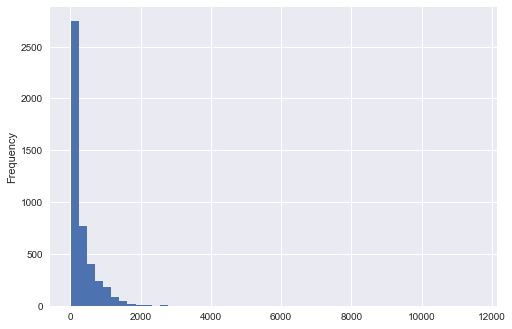

In [18]:
lead_articles.mins_as_lead.plot.hist(bins=50)

For lead, it's a  significant thing for an article to be lead at all, so although we want to penalise articles that were lead for a very short time, mostly we want to score the maximum even if it wasn't lead for ages. So we'll give maximum points when something has been lead for an hour.

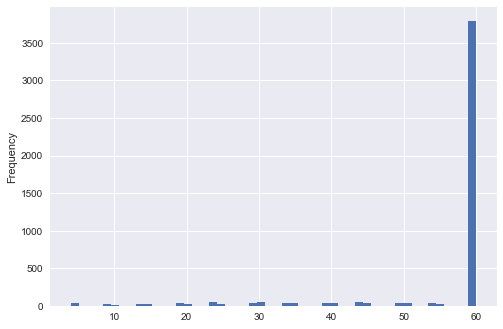

In [19]:
lead_articles.mins_as_lead.clip_upper(60).plot.hist(bins=50)

We also want to scale this by the alexa page rank, such that the maximum score of 20 points is for an article that was on the front for 4 hours for the most popular site.

So lets explore the alexa nunbers.

In [20]:
alexa_ranks = data.groupby(by="publisher_id").alexa_rank.mean().sort_values()
alexa_ranks

publisher_id
bbc_co_uk                               96
cnn_com                                105
nytimes_com                            120
theguardian_com                        142
buzzfeed_com                           147
dailymail_co_uk                        158
washingtonpost_com                     191
huffingtonpost_com                     215
foxnews_com                            285
rt_com                                 365
telegraph_co_uk                        370
independent_co_uk                      386
reuters_com                            497
npr_org                                594
lemonde_fr                             618
mirror_co_uk                           706
nbcnews_com                            826
breitbart_com                          994
ft_com                                1596
economist_com                         1825
indy100_com                           5014
thetimes_co_uk                        6435
newstatesman_com                     1276

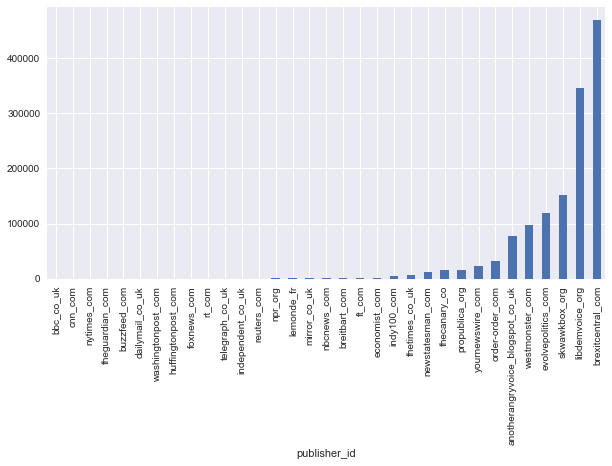

In [21]:
alexa_ranks.plot.bar(figsize=[10,5])

Let's try the simple option first: just divide the number of minutes as lead by the alexa rank. What's the scale of numbers we get then.

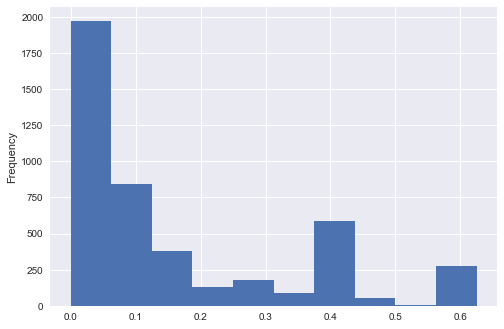

In [22]:
lead_proposal_1 = lead_articles.mins_as_lead.clip_upper(60) / lead_articles.alexa_rank
lead_proposal_1.plot.hist()

Looks like there's too much of a cluster around 0. Have we massively over penalised the publishers with a high alexa rank?

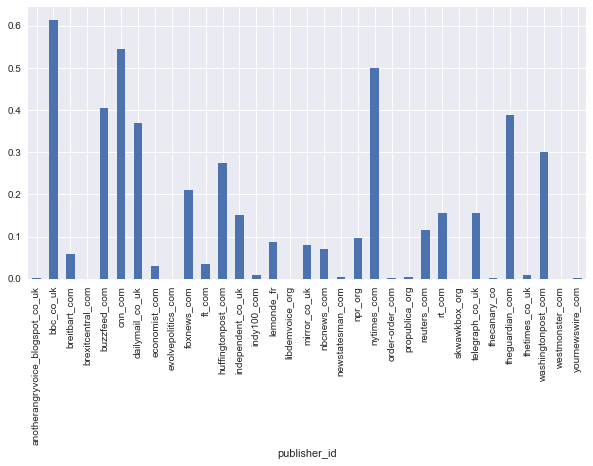

In [23]:
lead_proposal_1.groupby(data.publisher_id).mean().plot.bar(figsize=[10,5])

Yes. Let's try taking the log of the alexa rank and see if that looks better.

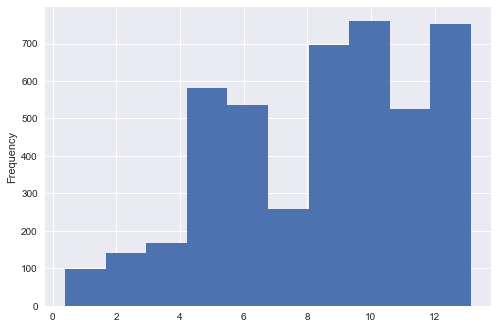

In [24]:
lead_proposal_2 = (lead_articles.mins_as_lead.clip_upper(60) / np.log(lead_articles.alexa_rank))
lead_proposal_2.plot.hist()

In [25]:
lead_proposal_2.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,35.00,5.31,0.11,4.71,5.33,5.33,5.33,5.33
bbc_co_uk,101.00,12.90,1.46,1.10,13.15,13.15,13.15,13.15
breitbart_com,202.00,8.32,1.45,0.58,8.69,8.69,8.69,8.69
brexitcentral_com,47.00,4.38,0.84,0.69,4.59,4.59,4.59,4.59
buzzfeed_com,302.00,11.89,0.90,1.80,12.02,12.02,12.02,12.02
cnn_com,198.00,12.26,2.14,0.86,12.89,12.89,12.89,12.89
dailymail_co_uk,169.00,11.54,1.46,0.99,11.85,11.85,11.85,11.85
economist_com,42.00,7.22,2.19,0.53,7.99,7.99,7.99,7.99
evolvepolitics_com,27.00,5.13,0.02,5.05,5.13,5.13,5.13,5.13


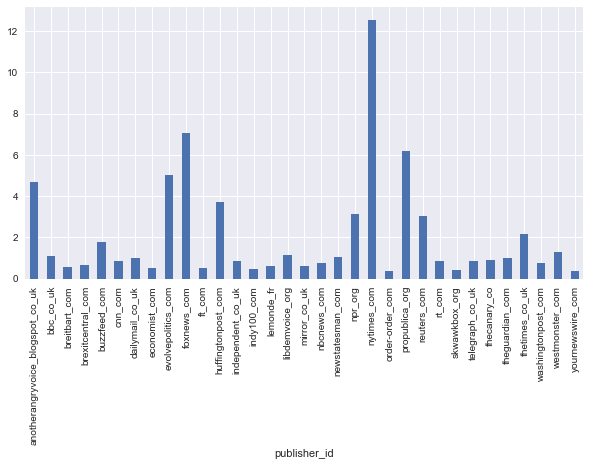

In [26]:
lead_proposal_2.groupby(data.publisher_id).min().plot.bar(figsize=[10,5])

That looks about right, as long as the smaller publishers were closer to zero. So let's apply feature scaling to this, to give a number between 1 and 20. (Anything not as lead will pass though as zero.)

In [27]:
def rescale(series):
    return (series - series.min()) / (series.max() - series.min())

lead_proposal_3 = np.ceil(20 * rescale(lead_proposal_2))

In [28]:
lead_proposal_2.min(), lead_proposal_2.max()

(0.38500569152790032, 13.145359968846892)

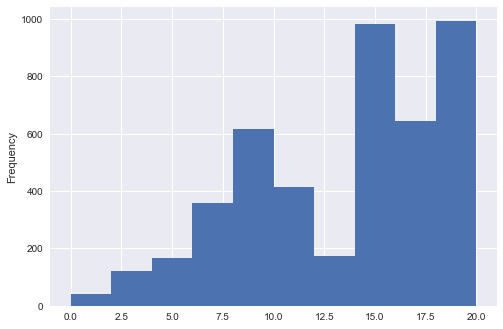

In [29]:
lead_proposal_3.plot.hist()

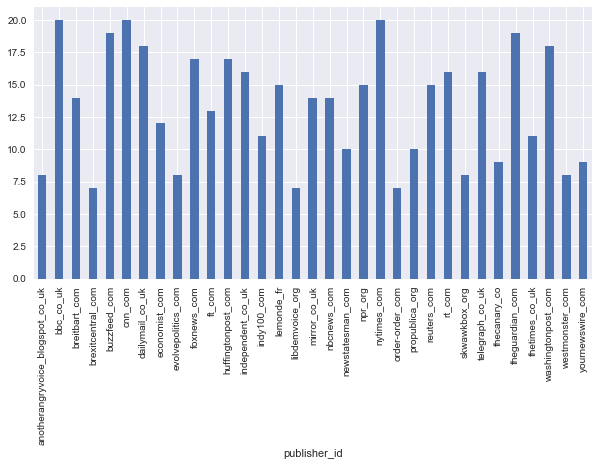

In [30]:
lead_proposal_3.groupby(data.publisher_id).median().plot.bar(figsize=[10,5])

In [31]:
data["lead_score"] = pd.concat([lead_proposal_3, data.mins_as_lead[data.mins_as_lead==0]])

In [32]:
data.lead_score.value_counts().sort_index()

0.00     154372
1.00         40
2.00         57
3.00         63
4.00         79
5.00         88
6.00         79
7.00        281
8.00        299
9.00        317
10.00       218
11.00       196
12.00        62
13.00       112
14.00       585
15.00       398
16.00       362
17.00       284
18.00       242
19.00       424
20.00       327
Name: lead_score, dtype: int64

In [33]:
data.lead_score.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          20.00
breitbart_com                      14.00
brexitcentral_com                   7.00
buzzfeed_com                       19.00
cnn_com                            20.00
dailymail_co_uk                    18.00
economist_com                      12.00
evolvepolitics_com                  8.00
foxnews_com                        17.00
ft_com                             13.00
huffingtonpost_com                 17.00
independent_co_uk                  16.00
indy100_com                        11.00
lemonde_fr                         15.00
libdemvoice_org                     7.00
mirror_co_uk                       14.00
nbcnews_com                        14.00
newstatesman_com                   10.00
npr_org                            15.00
nytimes_com                        20.00
order-order_com                     9.00
propublica_org                     10.00
reuters_com                        15.00
rt_

In summary then, score for article $a$ is:


$$
unscaledLeadScore_a = \frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)}\\
leadScore_a = 19 \cdot 
\frac{unscaledLeadScore_a - \min(unscaledLeadScore)}
{\max(unscaledLeadScore) - \min(unscaledLeadScore)} 
+ 1
$$

Since the minium value of $minsAsLead$ is 1, $\min(unscaledLeadScore)$ is pretty insignificant. So we can simplify this to:

$$
leadScore_a = 20 \cdot 
\frac{unscaledLeadScore_a }
     {\max(unscaledLeadScore)} 
$$

or: 

$$
leadScore_a = 20 \cdot 
\frac{\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} }
     {\frac{60}{\log(\max(alexaRank))}} 
$$

$$
leadScore_a = \left( 20 \cdot 
\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} \cdot
     {\frac{\log(\max(alexaRank))}{60}} \right)
$$

## Time on front score (15 points)

This is similar to time as lead, so lets try doing the same calculation, except we also want to factor in the number of slots on the front:


$$frontScore_a = 
15 
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) 
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right)$$

In [34]:
(data.alexa_rank * data.num_articles_on_front).min() / 1440

2.4500000000000002

In [35]:
time_on_front_proposal_1 = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15)

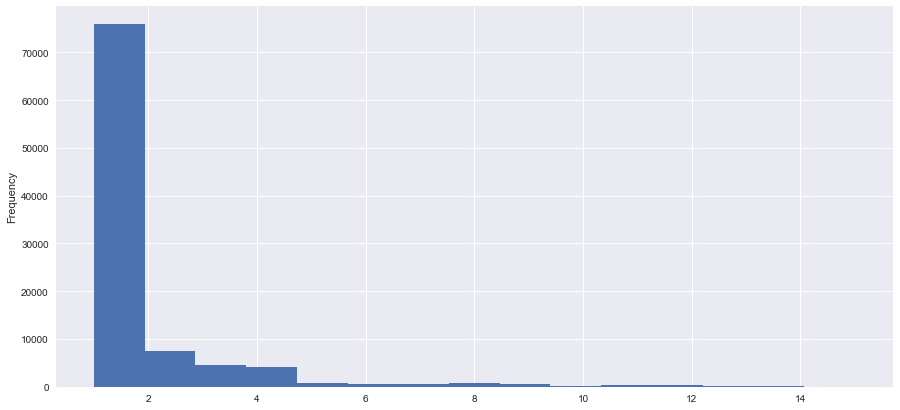

In [36]:
time_on_front_proposal_1.plot.hist(figsize=(15, 7), bins=15)

In [37]:
time_on_front_proposal_1.value_counts().sort_index()

1.00     75844
2.00      7589
3.00      4551
4.00      4163
5.00       791
6.00       581
7.00       569
8.00       890
9.00       586
10.00      223
11.00      308
12.00      348
13.00      120
14.00       66
15.00       35
dtype: int64

In [38]:
time_on_front_proposal_1.groupby(data.publisher_id).sum()

publisher_id
anotherangryvoice_blogspot_co_uk      38.00
bbc_co_uk                          15612.00
breitbart_com                       2624.00
brexitcentral_com                     53.00
buzzfeed_com                        9480.00
cnn_com                            12207.00
dailymail_co_uk                    14732.00
economist_com                        302.00
evolvepolitics_com                    74.00
foxnews_com                         7983.00
ft_com                              3528.00
huffingtonpost_com                  7713.00
independent_co_uk                   4548.00
indy100_com                          491.00
lemonde_fr                          3904.00
libdemvoice_org                      177.00
mirror_co_uk                        9900.00
nbcnews_com                         1981.00
newstatesman_com                     557.00
npr_org                             2492.00
nytimes_com                         9902.00
order-order_com                      295.00
propublica_org     

That looks good to me.

In [39]:
data["front_score"] = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15).fillna(0)

In [40]:
data.front_score 

id
df8cf9e5ed31a1bfb34c9b73d9e5bce5ab98b439   1.00
ff73a23349976db8c3e5ae3d4a64242b156f14a7   0.00
107efa77273acbbe8fd60c139306e7fcd09fdd98   2.00
5c4db3ff5ac83175ba202cb9327d7e7b52f79f46   0.00
faa6a6d39f269bf6a40af0f52f02a41cb5b38601   0.00
d8fdb38812bfa4ebf5096eff5c3836c7bfea2650   0.00
5b5056265c75d8f3c84a209365a3463b47aba3e1   0.00
c2376359478d79aec41cc87c60ce96a07200315e   0.00
58d25dd29d2cc5510e6f2aecfb19dfbad7d8072f   0.00
3f6ab2c7c68a2b1a231a2483781690e8208b504c   0.00
0c710c25d58126384a7a0b2e9a44ff1e1c84760f   0.00
b62c7a7e048c9c0b43894f1af09412fd03f526c4   1.00
da66ff6b2857b28d802ac43d51739b91ea537513   1.00
6acc7b4c632c0dd5783da419bd82f9c20500bce3   0.00
273a63e59763d0b4b8ddcc0cc0ea6890e70d3612   0.00
29630b4931d9094406c7da71a92654ff4aa3a804   0.00
b8b37dc30b7ad207bd93ae3cdb595a5ea634a5d1   0.00
95174653c48ade1a96c74d7eeb8daab72ad6438d   0.00
84401f2ca38991c4ccdf1518377132f3fd029157   1.00
48911d9ba1a31b061bc4c831bbc63670cc757aab   0.00
5d6fc4a824831cf8daf5c6d06c6649b72a9ae

## Facebook brand page promotion (15 points)

One way a publisher has of promoting content is to post to their brand page. The significance of doing so is stronger when the brand page has more followers (likes).

$$ facebookPromotionProposed1_a = 15 \left( \frac {brandPageLikes_a} {\max(brandPageLikes)} \right) $$

Now lets explore the data to see if that makes sense. **tr;dr the formula above is incorrect**

In [41]:
data.fb_brand_page_likes.max()

44693975.0

In [42]:
facebook_promotion_proposed_1 = np.ceil((15 * (data.fb_brand_page_likes / data.fb_brand_page_likes.max())).fillna(0))

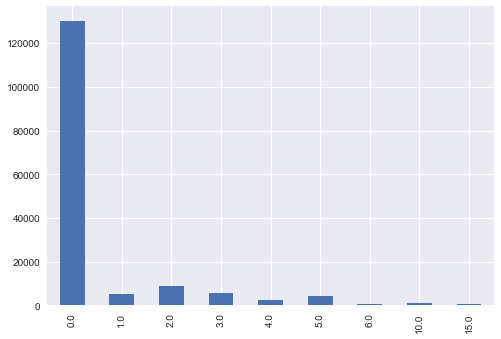

In [43]:
facebook_promotion_proposed_1.value_counts().sort_index().plot.bar()

In [44]:
facebook_promotion_proposed_1.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,38.00,0.84,0.37,0.00,1.00,1.00,1.00,1.00
bbc_co_uk,11973.00,0.63,3.02,0.00,0.00,0.00,0.00,15.00
breitbart_com,2707.00,0.90,0.99,0.00,0.00,0.00,2.00,2.00
brexitcentral_com,53.00,0.92,0.27,0.00,1.00,1.00,1.00,1.00
buzzfeed_com,2010.00,0.24,0.43,0.00,0.00,0.00,0.00,1.00
cnn_com,3521.00,2.74,4.46,0.00,0.00,0.00,10.00,10.00
dailymail_co_uk,24900.00,0.56,1.58,0.00,0.00,0.00,0.00,5.00
economist_com,517.00,2.22,1.32,0.00,0.00,3.00,3.00,3.00
evolvepolitics_com,74.00,0.50,0.50,0.00,0.00,0.50,1.00,1.00


That's too much variation: sites like the Guardian, which have a respectable 7.5m likes, should not be scoring a 3. Lets try applying a log to it, and then standard feature scaling again.

In [45]:
data.fb_brand_page_likes.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk     330074.00
bbc_co_uk                          44693975.00
breitbart_com                       3720252.00
brexitcentral_com                     11212.00
buzzfeed_com                        2753297.00
cnn_com                            29136270.00
dailymail_co_uk                    13152590.00
economist_com                       8351246.00
evolvepolitics_com                   113625.00
foxnews_com                        16012614.00
ft_com                              3699305.00
huffingtonpost_com                  9795839.00
independent_co_uk                   7729827.00
indy100_com                          228462.00
lemonde_fr                          3930501.00
libdemvoice_org                        8591.00
mirror_co_uk                        2904439.00
nbcnews_com                         9346923.00
newstatesman_com                     154712.00
npr_org                             6234045.00
nytimes_com                        14853130.00


In [46]:
np.log(2149)

7.6727578966425103

In [47]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max())

publisher_id
anotherangryvoice_blogspot_co_uk   12.71
bbc_co_uk                          17.62
breitbart_com                      15.13
brexitcentral_com                   9.32
buzzfeed_com                       14.83
cnn_com                            17.19
dailymail_co_uk                    16.39
economist_com                      15.94
evolvepolitics_com                 11.64
foxnews_com                        16.59
ft_com                             15.12
huffingtonpost_com                 16.10
independent_co_uk                  15.86
indy100_com                        12.34
lemonde_fr                         15.18
libdemvoice_org                     9.06
mirror_co_uk                       14.88
nbcnews_com                        16.05
newstatesman_com                   11.95
npr_org                            15.65
nytimes_com                        16.51
order-order_com                    10.71
propublica_org                     12.82
reuters_com                        15.18
rt_

That's more like it, but the lower numbers should be smaller.

In [48]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max() / 1000)

publisher_id
anotherangryvoice_blogspot_co_uk    5.80
bbc_co_uk                          10.71
breitbart_com                       8.22
brexitcentral_com                   2.42
buzzfeed_com                        7.92
cnn_com                            10.28
dailymail_co_uk                     9.48
economist_com                       9.03
evolvepolitics_com                  4.73
foxnews_com                         9.68
ft_com                              8.22
huffingtonpost_com                  9.19
independent_co_uk                   8.95
indy100_com                         5.43
lemonde_fr                          8.28
libdemvoice_org                     2.15
mirror_co_uk                        7.97
nbcnews_com                         9.14
newstatesman_com                    5.04
npr_org                             8.74
nytimes_com                         9.61
order-order_com                     3.80
propublica_org                      5.91
reuters_com                         8.27
rt_

In [49]:
scaled_fb_brand_page_likes = (data.fb_brand_page_likes / 1000)
facebook_promotion_proposed_2 = np.ceil(\
    (15 * \
     (np.log(scaled_fb_brand_page_likes) / np.log(scaled_fb_brand_page_likes.max()))\
    )\
                                       ).fillna(0)

In [50]:
facebook_promotion_proposed_2.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    9.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   4.00
buzzfeed_com                       12.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  7.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         8.00
lemonde_fr                         12.00
libdemvoice_org                     4.00
mirror_co_uk                       12.00
nbcnews_com                        13.00
newstatesman_com                    8.00
npr_org                            13.00
nytimes_com                        14.00
order-order_com                     6.00
propublica_org                      9.00
reuters_com                        12.00
rt_

LGTM. So the equation is


$$ facebookPromotion_a = 15 \left( 
\frac {\log(\frac {brandPageLikes_a}{1000})} 
{\log(\frac {\max(brandPageLikes)}{1000}))} \right) $$


Now, let's try applying standard feature scaling approch to this, rather than using a magic number of 1,000. That equation would be:

\begin{align}
unscaledFacebookPromotion_a &= 
   \log(brandPageLikes_a) \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \min(unscaledFacebookPromotion)}{\max(unscaledFacebookPromotion) - \min(unscaledFacebookPromotion)}  \\
\\
\text{The scaling can be simplified to:} \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \\
\\
\text{Meaning the overall equation becomes:} \\
facebookPromotion_a &= 
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))} 
   \end{align}


In [51]:
facebook_promotion_proposed_3 = np.ceil(
    (14 * 
     ( 
         (np.log(data.fb_brand_page_likes) - np.log(data.fb_brand_page_likes.min()) ) /
         (np.log(data.fb_brand_page_likes.max()) - np.log(data.fb_brand_page_likes.min()))
     )
    ) + 1
                                       )

In [52]:
facebook_promotion_proposed_3.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   3.00
buzzfeed_com                       11.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  6.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         7.00
lemonde_fr                         12.00
libdemvoice_org                     2.00
mirror_co_uk                       11.00
nbcnews_com                        13.00
newstatesman_com                    7.00
npr_org                            12.00
nytimes_com                        14.00
order-order_com                     5.00
propublica_org                      8.00
reuters_com                        12.00
rt_

In [53]:
data["facebook_promotion_score"] = facebook_promotion_proposed_3.fillna(0.0)

# Review

In [54]:
data["promotion_score"] = (data.lead_score + data.front_score + data.facebook_promotion_score)
data["attention_index"] = (data.promotion_score + data.response_score)

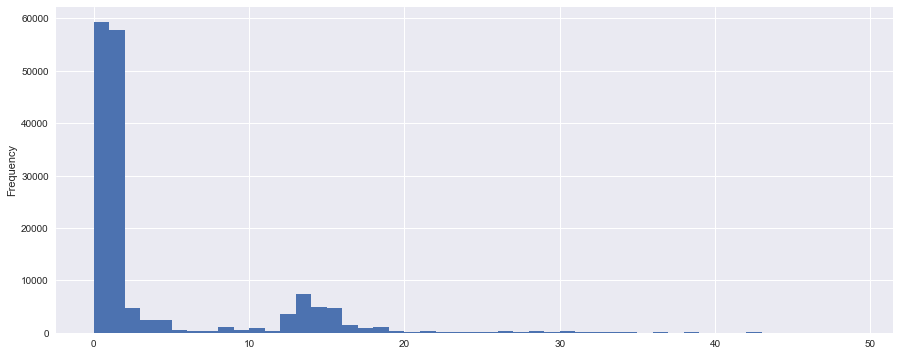

In [55]:
data.promotion_score.plot.hist(bins=np.arange(50), figsize=(15,6))

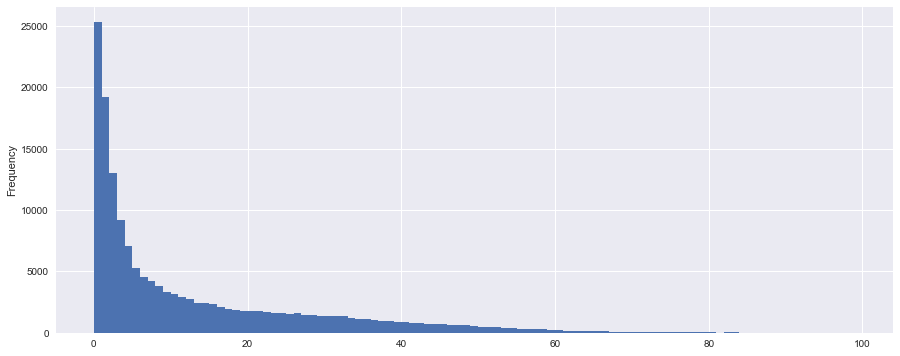

In [56]:
data.attention_index.plot.hist(bins=np.arange(100), figsize=(15,6))

In [57]:
data.attention_index.value_counts().sort_index()

0.00     25301
1.00     19223
2.00     13018
3.00      9206
4.00      7096
5.00      5298
6.00      4565
7.00      4207
8.00      3798
9.00      3294
10.00     3141
11.00     2918
12.00     2747
13.00     2446
14.00     2401
15.00     2309
16.00     2109
17.00     1949
18.00     1853
19.00     1811
20.00     1774
21.00     1788
22.00     1726
23.00     1636
24.00     1589
25.00     1552
26.00     1594
27.00     1445
28.00     1437
29.00     1384
         ...  
67.00       94
68.00       92
69.00       62
70.00       60
71.00       48
72.00       54
73.00       44
74.00       35
75.00       41
76.00       39
77.00       32
78.00       38
79.00       30
80.00       26
81.00       22
82.00       27
83.00       27
84.00       12
85.00        9
86.00       16
87.00       10
88.00       18
89.00       11
90.00        3
91.00        7
92.00        2
93.00        5
94.00        3
95.00        1
98.00        1
Name: attention_index, Length: 97, dtype: int64

In [58]:
# and lets see the articles with the biggest attention index
data.sort_values("attention_index", ascending=False)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index
id,,,,,,,,,,,,,,,,,,,,,
82f641a891db565edfcef82af5dac6e60f18dc29,http://www.bbc.co.uk/news/world-europe-41780116,Catalans declare independence from Spain,2017-10-27 13:28:14.944,2017-10-27 13:26:28.000,122017,735.45,2017-10-27T13:49:10.398Z,25016,82794,14207,...,True,44557554.00,2017-10-27T13:36:37.000Z,96,50.00,20.00,13.00,15.00,48.00,98.00
fb7f2c7fc2b3d5d441f187c2cc298eb68481caca,http://www.bbc.co.uk/news/world-us-canada-4146...,'Active shooter' near Las Vegas casino,2017-10-02 05:58:13.020,2017-10-02 05:55:50.000,155740,282.82,2017-10-02T12:02:05.884Z,36936,96254,22550,...,True,44231064.00,2017-10-02T10:52:53.000Z,96,50.00,20.00,10.00,15.00,45.00,95.00
55a653279260f78e8c3d8fdae5ac3ff000ff1a63,http://www.cnn.com/2017/10/02/us/las-vegas-sho...,Portraits of the victims of the Las Vegas shoo...,2017-10-02 22:13:24.653,2017-10-02 22:08:01.000,121221,208.76,2017-10-03T00:26:03.622Z,10651,96865,13705,...,True,28779427.00,2017-10-02T23:30:10.000Z,105,50.00,20.00,9.00,15.00,44.00,94.00
67d0bda0783da4c5d2ce176c1d3144d21b226c7a,http://www.cnn.com/2017/10/30/politics/paul-ma...,"Manafort to turn himself in to Mueller, source...",2017-10-30 11:58:15.661,2017-10-30 11:55:36.000,163516,678.74,2017-10-30T12:10:03.568Z,47714,92136,23666,...,True,29101437.00,2017-10-30T11:57:37.000Z,105,50.00,20.00,9.00,15.00,44.00,94.00
f9ec6620251671f7010b07793542152080b97f63,http://www.bbc.co.uk/news/world-europe-41463719,Catalonia has 'won right to statehood',2017-10-01 20:49:10.902,2017-10-01 20:46:53.000,92269,283.28,2017-10-02T02:12:11.055Z,11378,71867,9024,...,True,44223789.00,2017-10-02T01:52:48.000Z,96,50.00,20.00,9.00,15.00,44.00,94.00
cec51f99475b0936b80e7e1f07661fd769850060,http://www.cnn.com/2017/10/08/politics/vice-pr...,Mike Pence leaves Colts game after anthem protest,2017-10-08 17:58:20.413,2017-10-08 17:54:50.000,154384,515.68,2017-10-08T18:40:09.200Z,64195,77072,13117,...,True,28829396.00,2017-10-08T18:21:38.000Z,105,50.00,20.00,8.00,15.00,43.00,93.00
d6c669a2a511a179c138c95cd00ecd21f67786ca,http://www.cnn.com/2017/10/16/health/puerto-ri...,Floating hospital sits near Puerto Rico after ...,2017-10-16 22:31:22.572,2017-10-16 22:29:14.000,95905,225.62,2017-10-17T18:04:09.923Z,16034,63684,16187,...,True,29040951.00,2017-10-17T02:29:12.000Z,105,50.00,20.00,8.00,15.00,43.00,93.00
a40b5a3781bcdbb51023839d1e504623829509f7,https://www.buzzfeed.com/stephaniemcneal/lular...,"Women Say They're Stuck With $20,000 Of Worthl...",2017-10-25 20:40:31.730,2017-10-25 20:38:10.000,140824,764.35,2017-10-26T15:09:08.794Z,71842,53756,15226,...,True,2746668.00,2017-10-25T23:34:00.000Z,147,50.00,19.00,13.00,11.00,43.00,93.00
6f31aba0d9c375c9b6658dba325de9ba6aab5472,http://www.cnn.com/2017/10/27/politics/first-c...,Exclusive: First charges filed in Mueller inve...,2017-10-28 00:37:18.546,2017-10-28 00:29:59.000,676010,4464.02,2017-10-28T01:09:09.274Z,173337,425374,77299,...,True,29089089.00,2017-10-28T00:46:40.000Z,105,50.00,20.00,8.00,15.00,43.00,93.00


In [59]:
data["score_diff"] = data.promotion_score - data.response_score

In [60]:
# promoted but low response
data.sort_values("score_diff", ascending=False).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_likes,fb_brand_page_time,alexa_rank,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
e43a9b30900aab9765ce74c00665e24da573a56c,https://www.buzzfeed.com/aishagani/people-are-...,People Are Pointing Out A Black Woman Started ...,2017-10-19 11:43:24.546,2017-10-17 13:26:51,0,0.00,2017-10-19T11:55:04.504Z,0,0,0,...,2738311.00,2017-10-19T14:45:00.000Z,147,0.00,19.00,13.00,11.00,43.00,43.00,43.00
2b852dff5e7a3e4352681245f98178a56a52689b,https://www.buzzfeed.com/monicamark/meet-the-b...,Meet The Badass Women Wrestlers Of Senegal,2017-10-27 12:58:12.984,2017-10-23 14:54:04,3,0.27,2017-10-27T13:10:07.398Z,0,0,3,...,2748890.00,2017-10-28T17:45:00.000Z,147,1.00,19.00,13.00,11.00,43.00,44.00,42.00
74f30801f07e697b1804a420c37cddc54563401c,https://www.buzzfeed.com/danvergano/how-a-us-r...,How A US Raid On An Afghan Village Went Wrong,2017-10-17 16:01:29.821,2017-10-16 16:57:47,18,0.28,2017-10-17T17:12:09.350Z,2,3,13,...,2736252.00,2017-10-17T23:04:00.000Z,147,3.00,19.00,14.00,11.00,44.00,47.00,41.00
68c78eedcf54c1421649c1287bda9cd7cdc624ef,https://www.buzzfeed.com/arianelange/fbi-in-ho...,Inside The FBI's Half-Secret Relationship With...,2017-10-09 16:34:18.783,2017-10-07 17:17:50,2,0.18,2017-10-09T16:46:05.185Z,0,0,2,...,2714329.00,2017-10-09T19:21:00.000Z,147,1.00,19.00,12.00,11.00,42.00,43.00,41.00
c616bb3ad332266cfa9dfc11b2d1cc2518b466d0,https://www.buzzfeed.com/talalansari/trumps-an...,Trump’s Anti-Islam Rhetoric Convinced These Mu...,2017-10-31 13:04:18.596,2017-10-26 18:18:02,1,0.10,2017-10-31T13:15:06.299Z,0,0,1,...,2750122.00,2017-10-31T14:32:31.000Z,147,0.00,19.00,7.00,11.00,37.00,37.00,37.00
e30407d0a2a955d86fd7299f4df704bd8f9d7f7e,https://www.buzzfeed.com/kateaurthur/harvey-we...,Harvey Weinstein's Leave May Or May Not Be Per...,2017-10-07 00:24:08.404,2017-10-06 23:39:18,32,0.20,2017-10-07T00:35:07.428Z,2,13,17,...,2714137.00,2017-10-09T00:28:00.000Z,147,5.00,19.00,11.00,11.00,41.00,46.00,36.00
13fbafcfe4f592d7705b509fa4156fb1f30704d2,https://www.buzzfeed.com/verabergengruen/for-t...,"For These Veterans, Growing Pot Isn't Just A J...",2017-10-18 14:01:22.471,2017-10-17 16:44:09,25,0.25,2017-10-18T17:14:11.226Z,0,9,16,...,2737415.00,2017-10-19T00:44:00.000Z,147,4.00,19.00,10.00,11.00,40.00,44.00,36.00
10d029b2ac847112ad6c076081c70041fcfe5fe3,https://www.buzzfeed.com/claudiarosenbaum/harv...,Harvey Weinstein Is Suing His Old Company To O...,2017-10-26 21:22:23.665,2017-10-26 21:20:36,67,0.11,2017-10-26T22:35:03.393Z,8,36,23,...,2747080.00,2017-10-27T03:27:00.000Z,147,8.00,19.00,12.00,11.00,42.00,50.00,34.00
ac204bbe8809292e367036ba771b54ca74182593,https://www.buzzfeed.com/karlazabludovsky/thes...,These Women Tried To Take Hashtag Activism Int...,2017-10-29 14:22:21.368,2017-10-28 13:28:16,0,0.00,2017-10-29T14:34:05.941Z,0,0,0,...,nan,NaN,147,0.00,19.00,15.00,0.00,34.00,34.00,34.00


In [61]:
# high response but not promoted
data.sort_values("score_diff", ascending=True).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_likes,fb_brand_page_time,alexa_rank,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
71e81f0fcfa22600f98d3cc4ee27936533a4dd6d,https://www.nytimes.com/2017/10/19/opinion/lup...,Lupita Nyong’o: What Harvey Weinstein Did to Me,2017-10-19 23:10:05.465,2017-10-19 23:07:39.000,220864,348.36,2017-10-20T01:13:06.889Z,17754,170298,32812,...,nan,NaN,120,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
46291bc86b71eb9568baeacc57bb29da4aa758c4,http://www.washingtonpost.com/video/politics/t...,Trump says he 'met with the president of the V...,2017-10-13 15:04:21.372,2017-10-13 14:40:20.000,108872,120.46,2017-10-13T21:35:05.768Z,39459,57244,12169,...,nan,NaN,191,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
8583d374f97cb80471a866e026c2a2114ac22b11,https://www.buzzfeed.com/karlazabludovsky/miss...,"Em vez de suas medidas, as candidatas a Miss P...",2017-10-31 12:34:10.273,2017-10-31 12:33:01.000,85716,100.23,2017-10-31T20:07:10.376Z,1614,80030,4072,...,nan,NaN,147,49.00,0.00,0.00,0.00,0.00,49.00,-49.00
c49994bf9bef90ef3cf7ce862b2d09a51199cba1,https://www.rt.com/on-air/407672-white-house-n...,White House holds news briefing,2017-10-24 19:54:26.936,2017-10-24 19:54:26.936,177442,2947.13,2017-10-24T23:06:06.316Z,24436,10728,142278,...,nan,NaN,365,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
d6eab40c5d349770d620186b1b1bfdad866a6846,https://www.washingtonpost.com/news/answer-she...,9 million kids get health insurance under CHIP...,2017-10-01 17:31:23.893,2017-10-01 17:26:15.000,111959,85.87,2017-10-02T16:20:07.039Z,14799,72543,24617,...,nan,NaN,191,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
d6bbd1d2c466964efa980539db7814a33b8c2e20,https://www.rt.com/on-air/407022-candlelit-mar...,Candlelit march held in Barcelona in solidarit...,2017-10-17 17:54:24.750,2017-10-17 17:52:46.000,177581,2902.54,2017-10-17T22:07:04.448Z,24414,10853,142314,...,nan,NaN,365,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
93d2e448be2afe095cdf31db88283f7d635eb3c0,http://www.foxnews.com/us/2017/10/30/miami-art...,Miami art professor turns American flags into ...,2017-10-30 21:49:14.134,2017-10-30 18:16:40.000,157318,67.36,2017-11-02T16:59:10.278Z,45507,91575,20236,...,nan,NaN,285,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
f9695aa2c3ffc63dd26bf44f6a0cb6db2f93c28d,http://www.foxnews.com/us/2017/10/08/vice-pres...,Vice President Mike Pence leaves Colts-49ers g...,2017-10-08 17:39:14.984,2017-10-08 17:30:30.000,904129,3142.79,2017-10-08T19:13:11.760Z,118524,749560,36045,...,nan,NaN,285,50.00,0.00,2.00,0.00,2.00,52.00,-48.00
0ecdbba916a0f44b8091a64825d318312ceb86e1,https://www.nbcnews.com/storyline/hurricane-ha...,Former presidents call for unity at hurricane ...,2017-10-22 02:54:14.794,2017-10-22 02:51:38.000,83119,235.52,2017-10-22T05:16:11.007Z,2938,76430,3751,...,nan,NaN,826,49.00,0.00,1.00,0.00,1.00,50.00,-48.00


Write that data to a file. Note that the scores here are provisional for two reasons:
1. they should be using a rolling-month based on the article publication date to calculate medians/min/max etc, whereas in this workbook we as just using values for the month of May
2. for analysis, we've rounded the numbers; we don't expect to do that for the actual scores

In [62]:
data.to_csv("articles_with_provisional_scores_2017-10-01_2017-10-31.csv")

# Summary

The attention index of an article is comprised of four components:

- *lead score* (max 20 points) based on how long an article was the lead story on the publisher's home page, scaled by the traffic to that publisher
- *front score* (max 15 points) based on how long an article was present on the publisher's home page, scaled by traffic to that publisher
- *Facebook promotion score* (max 15 points) based on whether the article was promoted to the publisher's Facebook brand page, scaled by the reach of that brand page
- *response score* (max 50 points) based on the number of Facebook engagements the article received, relative to other articles

Or, in other words:

\begin{align}
attentionIndex_a &= leadScore_a + frontScore_a + facebookPromotionScore_a + responseScore_a \\
leadScore_a &= 20 \cdot \left(\frac{\min(minsAsLead_a, 60)}{alexaRank_a}\right) \cdot \left( \frac{\min(alexaRank)}{60} \right) \\
frontScore_a &= 
15 \cdot
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) \cdot
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right) \\
facebookPromotion_a &= 
\begin{cases}
 0 \text{ if not shared on brand page }\\
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \text{ otherwise }
\end{cases}   
\\
responseScore_a &= 
\begin{cases} 
   0 \text{ if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))} \text{ if } engagements_a > 0
\end{cases} \\
\end{align} 